<div dir=rtl>
نام و نام‌خانوادگی: محمدصادق مجیدی یزدی 
    <br/>
    شماره دانشجویی: 98106004
</div>

<div dir="rtl" style="text-align:center;font-size:32px"><b>تمرین سوم بخش عملی</b></div>

In [135]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns               
%matplotlib inline
sns.set()
plt.style.use("ggplot")

import warnings                                            
warnings.filterwarnings('ignore')

<div dir="rtl" style="font-size:20px"><b>بخش اول</b></div>

<div dir="rtl">
    ابتدا با استفاده از دیتاست‌های آماده کتابخانه sklearn دیتاست مربوط به قیمت خانه‌ها در بوستون آمریکا را لود می‌کنیم. با استفاده از کتابخانه pandas آن را به فرم یک دیتافریم درآورده و تارگت این دیتاست را به عنوان ستون MEDV به دیتافریم اضافه می‌کنیم.
    <br>
    در زیر چند ستون از دیتافریم تشکیل‌شده را مشاهده می‌کنید:
</div>

In [136]:
from sklearn.datasets import load_boston

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<div dir="rtl">
حال وجود مقادیر ناموجود در دیتاست را بررسی می‌کنیم. مشاهده می‌کنیم که تمامی مقادیر موجود هستند و همه ستون‌ها کاملا پر هستند.
</div>

In [137]:
print(df.isna().sum())
df.describe()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<div dir="rtl">
حال دیتاست را با استفاده از ابزار نمونه‌گیری کتابخانه
    pandas
    به نسبت 0.8 به 0.2 به دو بخش 
    train_set
    و
    test_set
    تقسیم می‌کنیم.
</div>

In [138]:
train_set = df.sample(frac=0.8, random_state=25)
test_set = df.drop(train_set.index)

print(f'dataset size: {len(df.index)}')
print(f'train set size is: {len(train_set.index)}')
print(f'test set size is: {len(test_set.index)}')
test_set.head()

dataset size: 506
train set size is: 405
test set size is: 101


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
14,0.63796,0.0,8.14,0.0,0.538,6.096,84.5,4.4619,4.0,307.0,21.0,380.02,10.26,18.2
22,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
36,0.09744,0.0,5.96,0.0,0.499,5.841,61.4,3.3779,5.0,279.0,19.2,377.56,11.41,20.0
44,0.12269,0.0,6.91,0.0,0.448,6.069,40.0,5.7209,3.0,233.0,17.9,389.39,9.55,21.2


<div dir="rtl">
تمام ستون‌های دیتاست از نوع عددی هستند. خلاصه اطلاعات آماری را برای دیتاست ترین نمایش می‌دهیم.
</div>

In [139]:
print(train_set.dtypes)
train_set.describe()

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000
mean,3.690754,11.422222,10.998272,0.074074,0.552424,6.305037,68.289383,3.832701,9.644444,408.461728,18.506667,356.133975,12.490222,22.641975
std,9.000285,23.743801,6.844123,0.262215,0.114389,0.692548,28.185770,2.107997,8.785508,170.196470,2.106210,92.755956,7.092760,9.232986
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.079780,0.000000,5.130000,0.000000,0.449000,5.898000,45.000000,2.109900,4.000000,281.000000,17.400000,375.210000,6.750000,17.000000
50%,0.239120,0.000000,8.560000,0.000000,0.532000,6.212000,77.700000,3.262800,5.000000,330.000000,19.100000,391.500000,11.280000,21.400000
75%,3.696950,12.500000,18.100000,0.000000,0.624000,6.635000,93.600000,5.231100,24.000000,666.000000,20.200000,396.300000,16.940000,25.300000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.770000,50.000000


<div dir="rtl" style="font-size:20px"><b>بخش دوم</b></div>

<div dir="rtl">
ابتدا نمودار هیت‌مپ را برای تمام ستون‌های دیتاست ترین رسم می‌کنیم. سپس به طور جداگانه به ازای تمام ستون‌های فیچر، نمودار
    hexplot(jointplot)
    و
    scatter
    مقدار هدف را بر حسب آن ستون رسم می‌کنیم.
</div>

<AxesSubplot:>

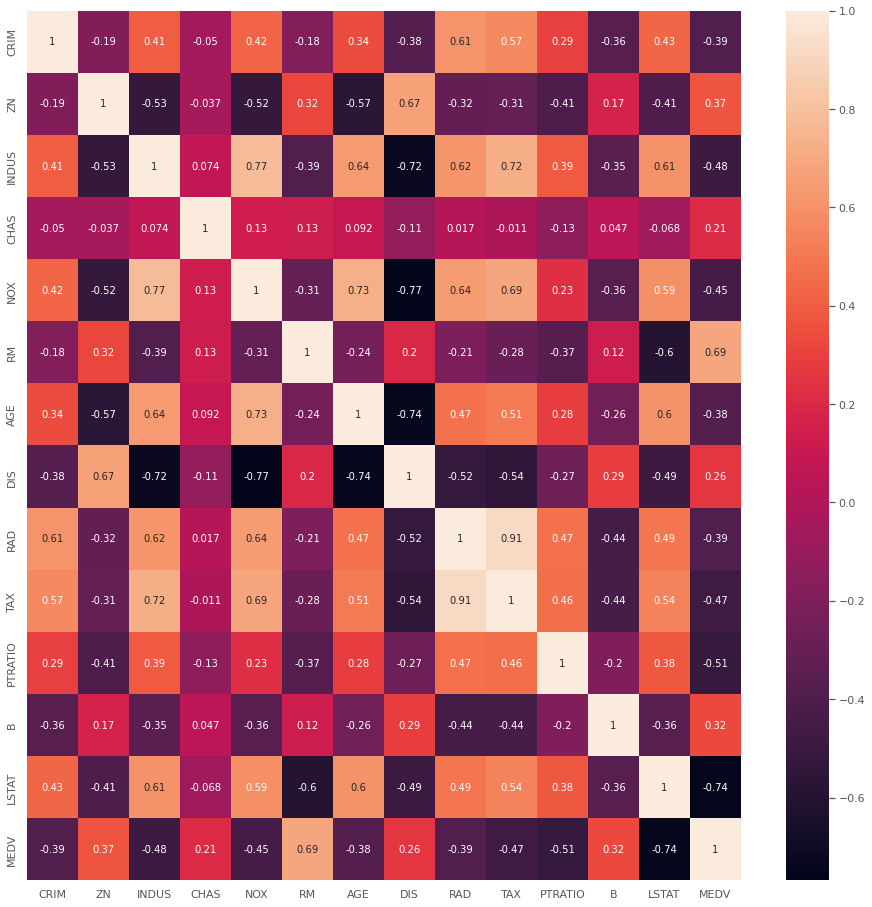

In [140]:
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(train_set.corr(), annot=True, ax=ax)

<Figure size 432x288 with 0 Axes>

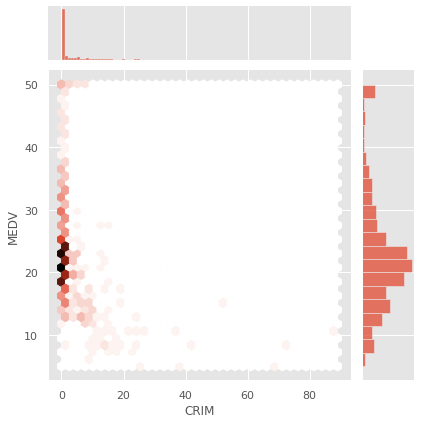

<Figure size 432x288 with 0 Axes>

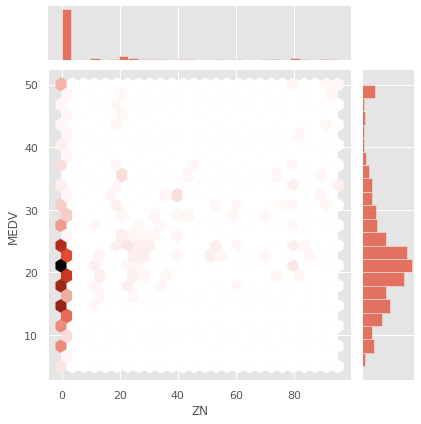

<Figure size 432x288 with 0 Axes>

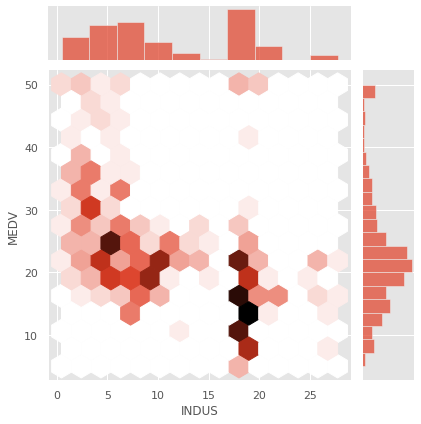

<Figure size 432x288 with 0 Axes>

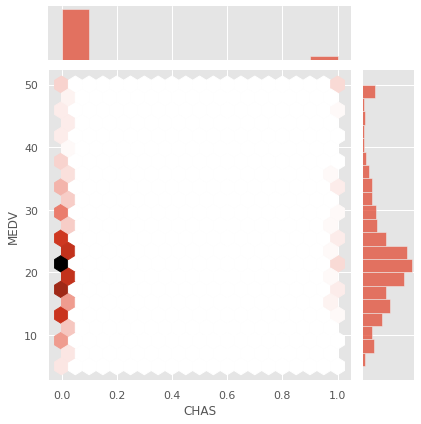

<Figure size 432x288 with 0 Axes>

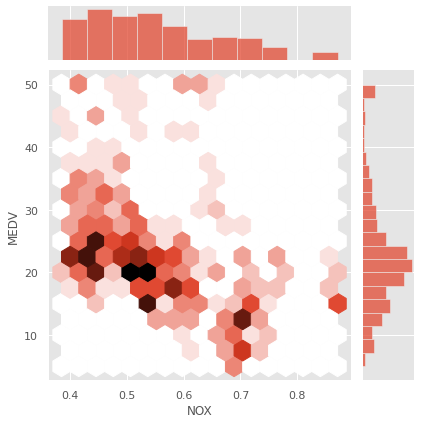

<Figure size 432x288 with 0 Axes>

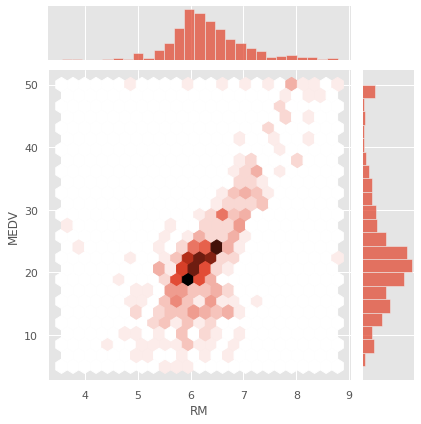

<Figure size 432x288 with 0 Axes>

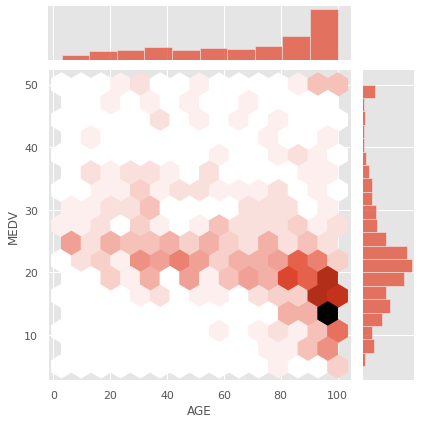

<Figure size 432x288 with 0 Axes>

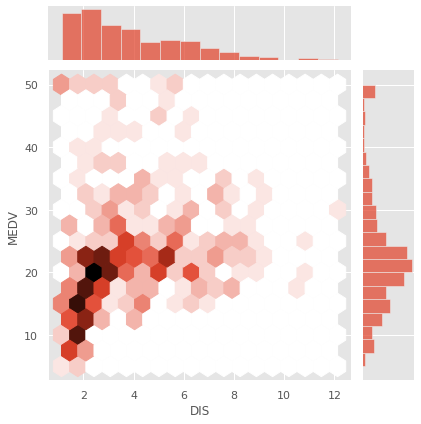

<Figure size 432x288 with 0 Axes>

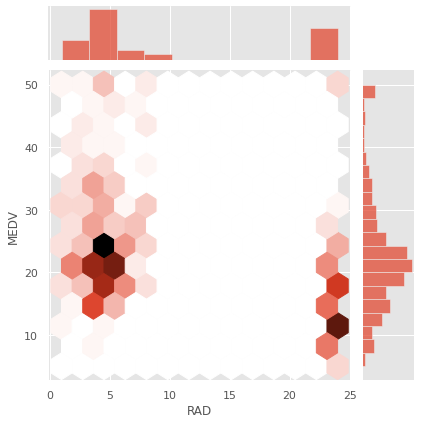

<Figure size 432x288 with 0 Axes>

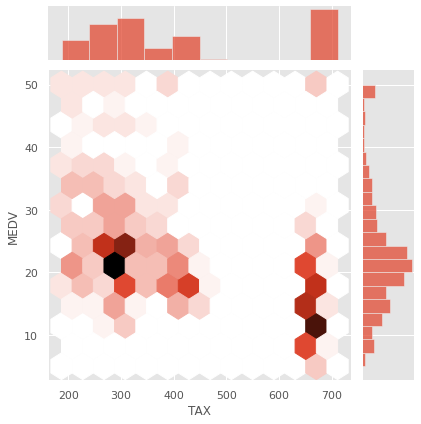

<Figure size 432x288 with 0 Axes>

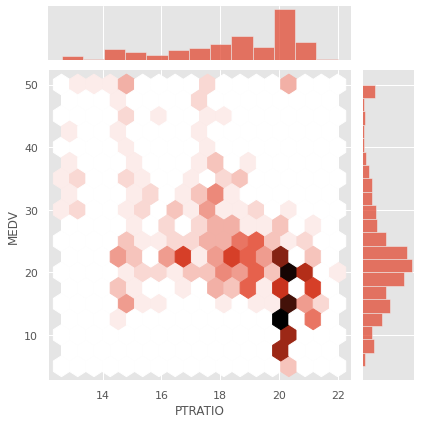

<Figure size 432x288 with 0 Axes>

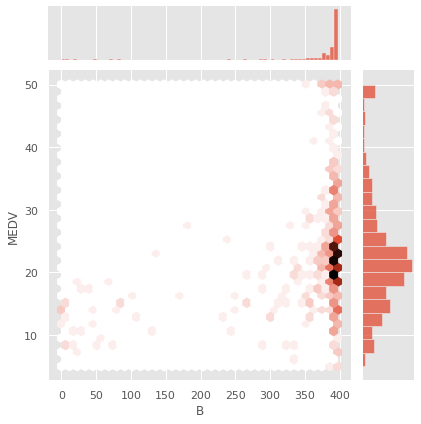

<Figure size 432x288 with 0 Axes>

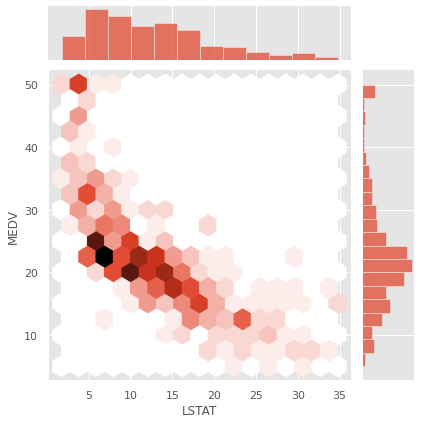

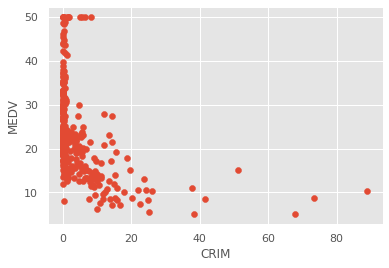

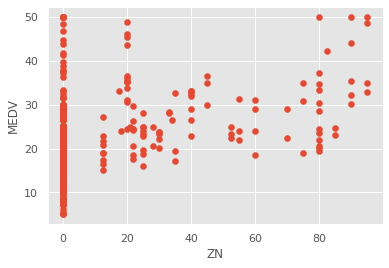

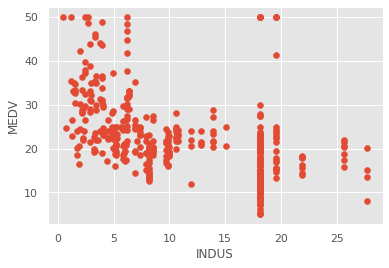

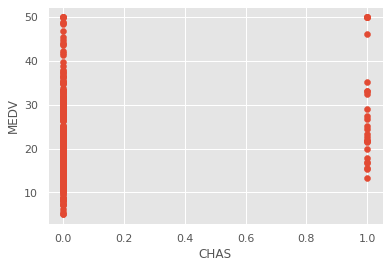

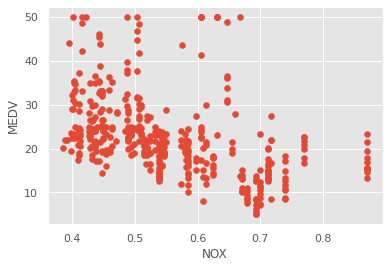

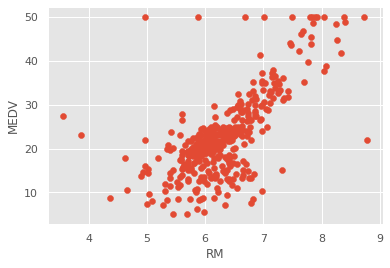

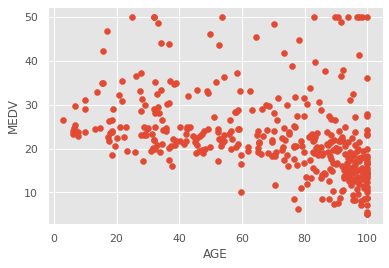

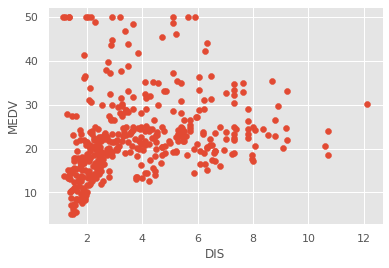

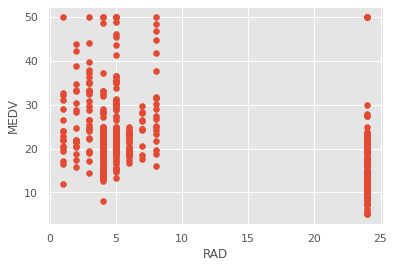

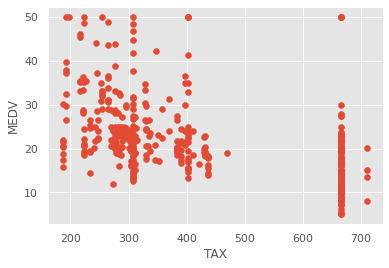

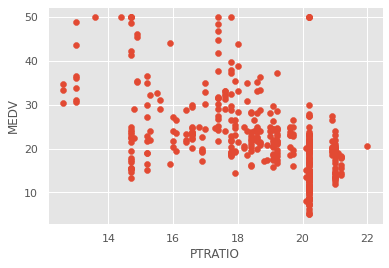

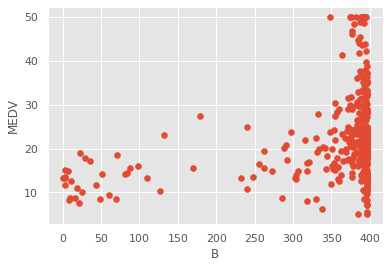

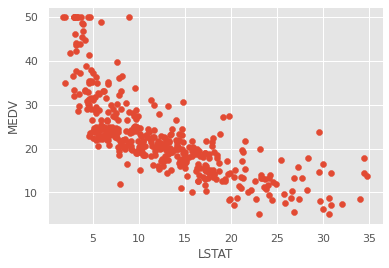

In [141]:
for column in train_set.columns[:-1]:
    plt.figure()
    sns.jointplot(data=train_set, x=str(column), y='MEDV', kind='hex')
    
for column in train_set.columns[:-1]:
    plt.figure()
    plt.scatter(*train_set[[str(column), 'MEDV']].to_numpy().T)
    plt.xlabel(str(column))
    plt.ylabel('MEDV')

<div dir="rtl">
با توجه به نمودارهای ترسیم‌شده اطلاعات زیر را کسب می‌کنیم:
    <br>
    ستون 
    MEDV
    با ستون
    RM
    همبستگی مستقیم زیادی دارد.(0.69)
    <br>
    همچنین ستون
    MEDV
    با ستون
    LSTAT
    همبستگی معکوس زیادی دارد.(-0.74)
    <br>
    ستون‌های
    ZN, CHAS, DIS, B
    همبستگی مستقیم و
    ستون‌های
    CRIM, INDUS, NOX, AGE, RAD, TAX, PTRATIO
    همبستگی معکوس با ستون لیبل
    (هدف)
    MEDV
    دارند.
</div>

<div dir="rtl">
حال به هر دو روش
    PCA
    و
    TSNE
    ابعاد داده‌ها را به 2 کاهش داده و در صفحه رسم می‌کنیم تا وجود گروه‌های احتمالی بین داده‌های دیتاست و در کل توزیع تقریبی داده‌ها را بررسی کنیم. روش
    TSNE
    نمودار بامعناتری از وضعیت داده‌ها را به دست می‌دهد.
    (برای رعایت اختصار از توابع کتابخانه‌ای برای عمل کاهش بعد استفاده کردیم)
</div>

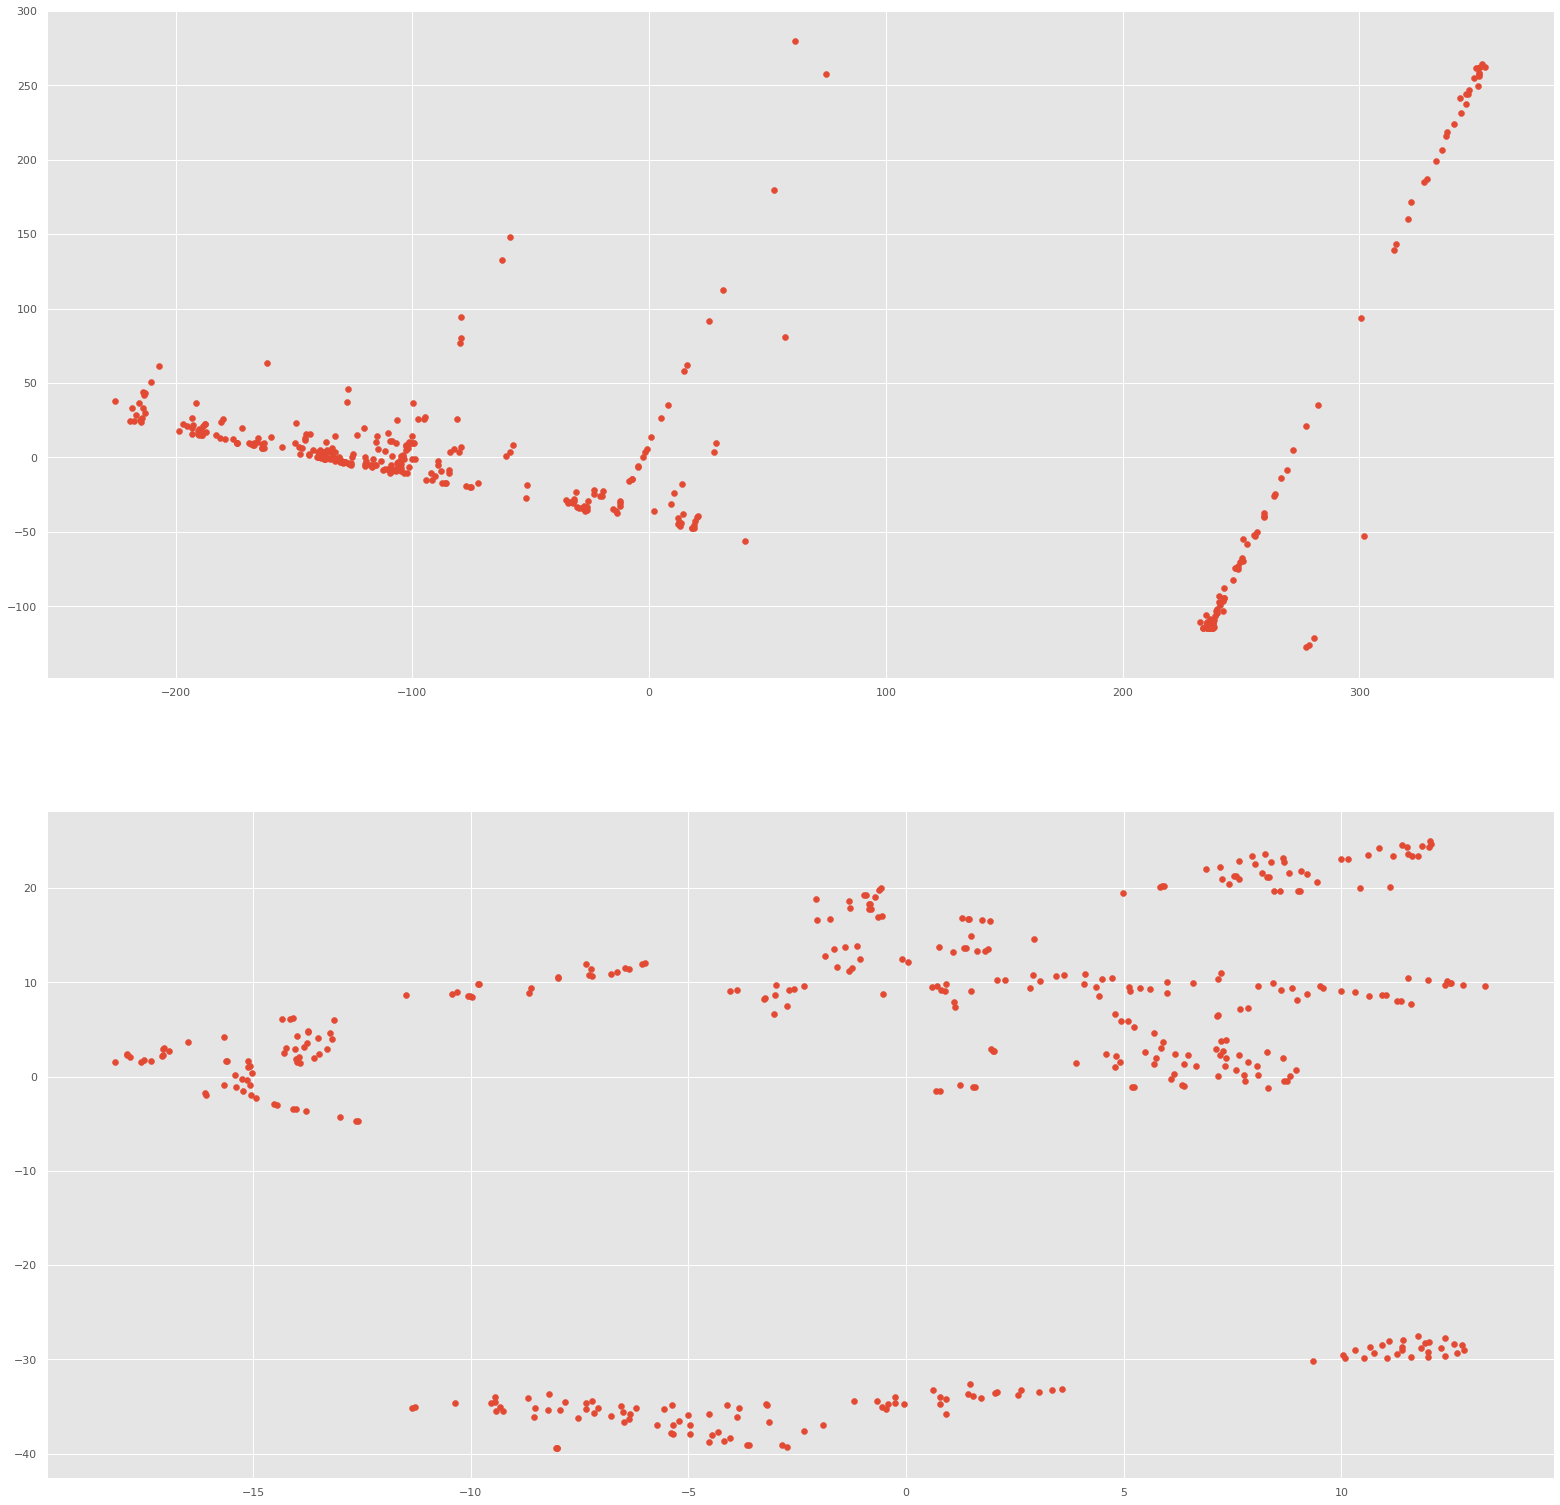

In [142]:
X = train_set[train_set.columns[:-1]].to_numpy()


from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_projection = pca.fit(X)
pca_projection = pca_projection.transform(X)

from sklearn.manifold import TSNE
tsne_projection = TSNE(n_components=2, learning_rate="auto").fit_transform(X, train_set['MEDV'].to_numpy())

fig2, ax2 = plt.subplots(2, figsize=(27,27))
ax2[0].scatter(*pca_projection.T)
ax2[1].scatter(*tsne_projection.T)

<div dir="rtl" style="font-size:20px"><b>بخش سوم</b></div>

<div dir="rtl">
در ۳ بخش بعد فرض می‌کنیم
    Linear Regression
    را بدون در نظر گرفتن عبارت منظم‌سازی در تابع هزینه انجام می‌دهیم. بنابراین فرم بسته برای محاسبه پارامترهای مدل به صورت زیر است:
    <br>
$$
W_{ML} = (\Phi^T \Phi)^{-1} \Phi^Tt
$$
$$
y = \Phi W_{ML}
$$
    <br>
    در این قسمت خود فیچرها را به صورت خطی به عنوان توابع پایه در نظر می‌گیریم.
</div>

In [143]:
phi1 = np.c_[np.ones(X.shape[0]), X]
y = train_set['MEDV'].to_numpy()
w1 = np.linalg.pinv(phi1).dot(y)
print('w is:')
print(w1)
predicted_values1 = phi1.dot(w1)
train_set['PRED'] = predicted_values1

w is:
[ 4.04880171e+01 -1.33211584e-01  5.36370559e-02  3.55141341e-02
  3.32619754e+00 -2.05298772e+01  3.45288065e+00  1.28511564e-02
 -1.47150821e+00  3.22496545e-01 -1.30890157e-02 -9.41885378e-01
  7.07612014e-03 -5.70361476e-01]


<div dir="rtl">
    در هر سه روش بکارگیری
    Linear Regression
    برای هر مجموعه مقادیر پیش‌بینی‌شده توسط مدل‌ها، نمودار مقدار پیش‌بینی‌شده و مقدار اصلی ستون
    MEDV
    را بر حسب ستون‌های
    LSTAT, DIS, RM, PTRATIO
    روی دیتاست ترین رسم می‌کنیم.
</div>

<AxesSubplot:xlabel='PTRATIO'>

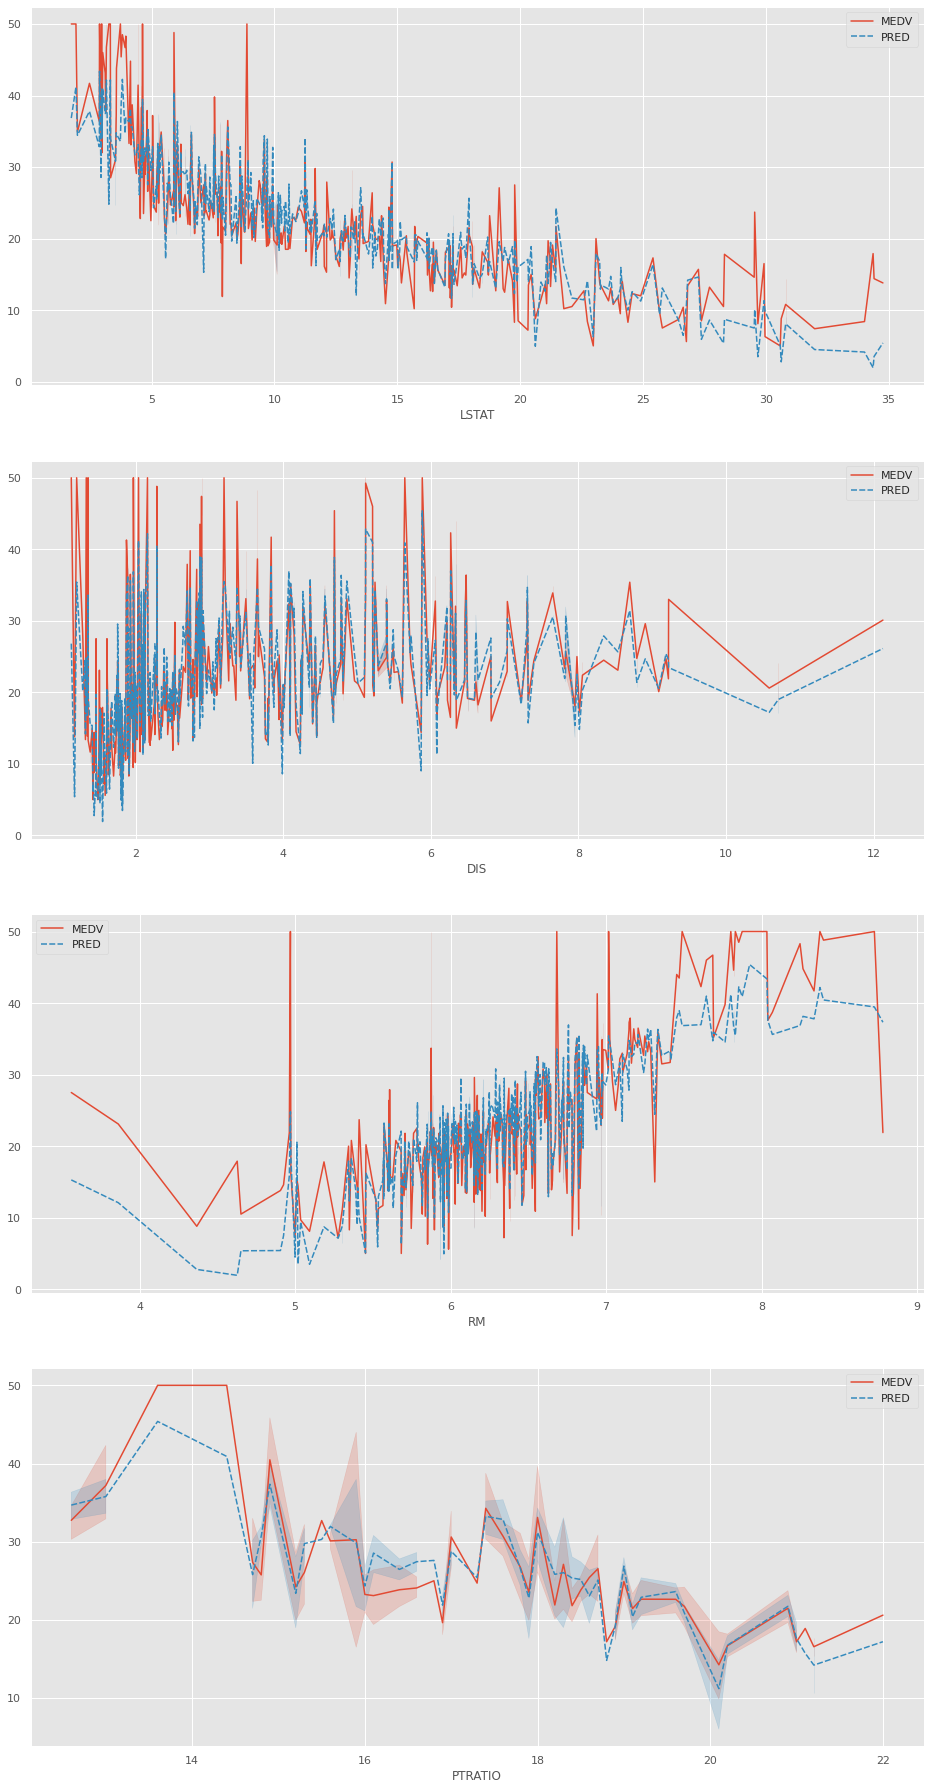

In [144]:
fig, axes = plt.subplots(4, figsize=(16,32))
sns.lineplot(data=train_set.set_index('LSTAT')[['MEDV', 'PRED']], ax=axes[0])
sns.lineplot(data=train_set.set_index('DIS')[['MEDV', 'PRED']], ax=axes[1])
sns.lineplot(data=train_set.set_index('RM')[['MEDV', 'PRED']], ax=axes[2])
sns.lineplot(data=train_set.set_index('PTRATIO')[['MEDV', 'PRED']], ax=axes[3])

<div dir="rtl" style="font-size:20px"><b>بخش چهارم</b></div>

<div dir="rtl">
در این قسمت علاوه بر خود فیچرها به صورت خطی، توان دوم هر فیچر را نیز به عنوان توابع پایه در نظر می‌گیریم.
</div>

In [145]:
phi2 = np.c_[np.ones(X.shape[0]), X, np.square(X)]
w2 = np.linalg.pinv(phi2).dot(y)
print('w is:')
print(w2)
predicted_values2 = phi2.dot(w2)
train_set['PRED2'] = predicted_values2

w is:
[ 1.61435076e+02 -3.90823104e-01 -6.84547402e-02 -2.43057500e-01
  1.58537362e+00 -1.81722147e+01 -1.77654219e+01  3.63010638e-03
 -2.15686940e+00  7.15650846e-01 -3.00925784e-02 -5.71787396e+00
  2.17844044e-02 -1.45479808e+00  3.22999020e-03  9.32915857e-04
  1.03946961e-02  1.58537362e+00 -4.58857228e+00  1.59020864e+00
  7.39206434e-05  1.03643810e-01 -1.25779470e-02  2.10093558e-05
  1.37882806e-01 -3.88645152e-05  2.62740691e-02]


<AxesSubplot:xlabel='PTRATIO'>

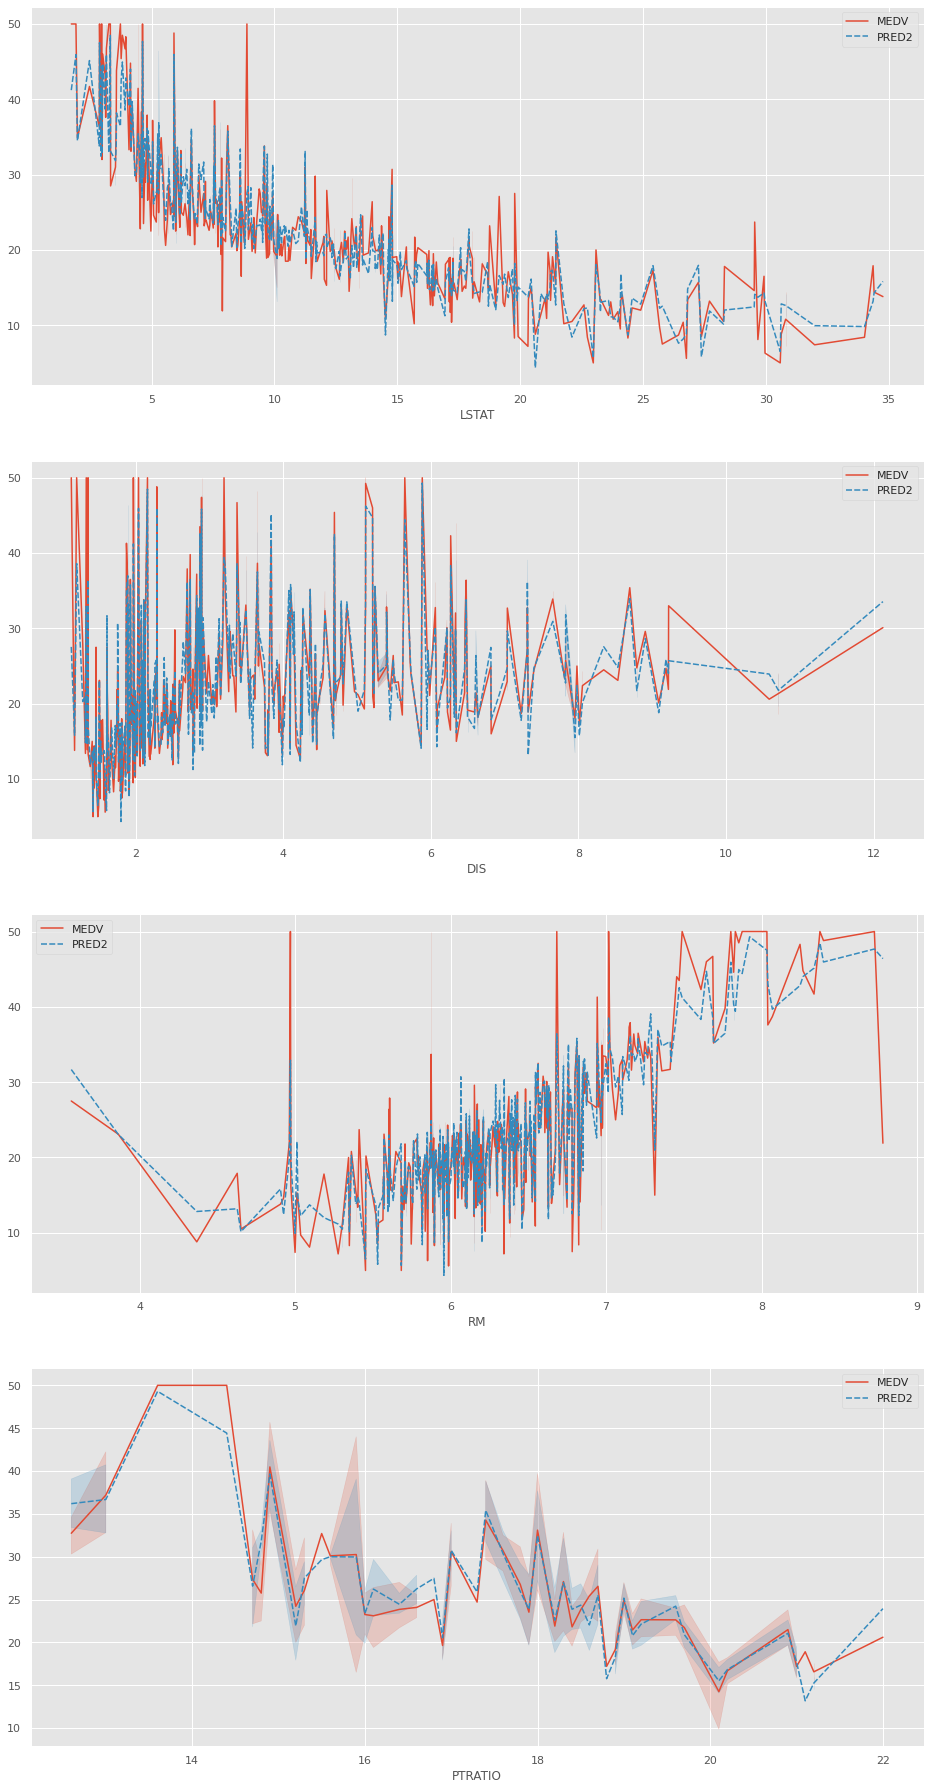

In [146]:
fig2, axes2 = plt.subplots(4, figsize=(16,32))
sns.lineplot(data=train_set.set_index('LSTAT')[['MEDV', 'PRED2']], ax=axes2[0])
sns.lineplot(data=train_set.set_index('DIS')[['MEDV', 'PRED2']], ax=axes2[1])
sns.lineplot(data=train_set.set_index('RM')[['MEDV', 'PRED2']], ax=axes2[2])
sns.lineplot(data=train_set.set_index('PTRATIO')[['MEDV', 'PRED2']], ax=axes2[3])

<div dir="rtl" style="font-size:20px"><b>بخش پنجم</b></div>

<div dir="rtl">
در این قسمت از ۱۰ تابع پایه گاوسی با بردار میانگین‌هایی که به صورت رندوم از بین لیبل‌های دیتاست انتخاب شده‌اند و مقدار
    spatial scale
    برابر 1 استفاده می‌کنیم.
</div>

In [147]:
M = 10

s = 1

ujs = train_set[train_set.columns[:-3]].sample(M).to_numpy()

def calculate_ith_gaussian_basis(features, i):
    return np.exp(np.linalg.norm(features - ujs[i]) / (-2 * (s**2)))

def get_gaussian_basis_vector(row):
    basis = []
    for i in range(M):
        basis.append(calculate_ith_gaussian_basis(row, i))
    return np.array(basis)

phi3 = np.c_[np.ones(X.shape[0]), np.apply_along_axis(get_gaussian_basis_vector, 1, X)]
w3 = np.linalg.pinv(phi3).dot(y)
print('w is:')
print(w3)
predicted_values3 = phi3.dot(w3)
train_set['PRED3'] = predicted_values3

w is:
[ 22.62656063  -9.55931707  -8.37038914   0.91886286  -4.29046394
 -13.82678468  12.28462044  -0.77484762   1.13211496   6.98254947
  22.81949081]


<AxesSubplot:xlabel='PTRATIO'>

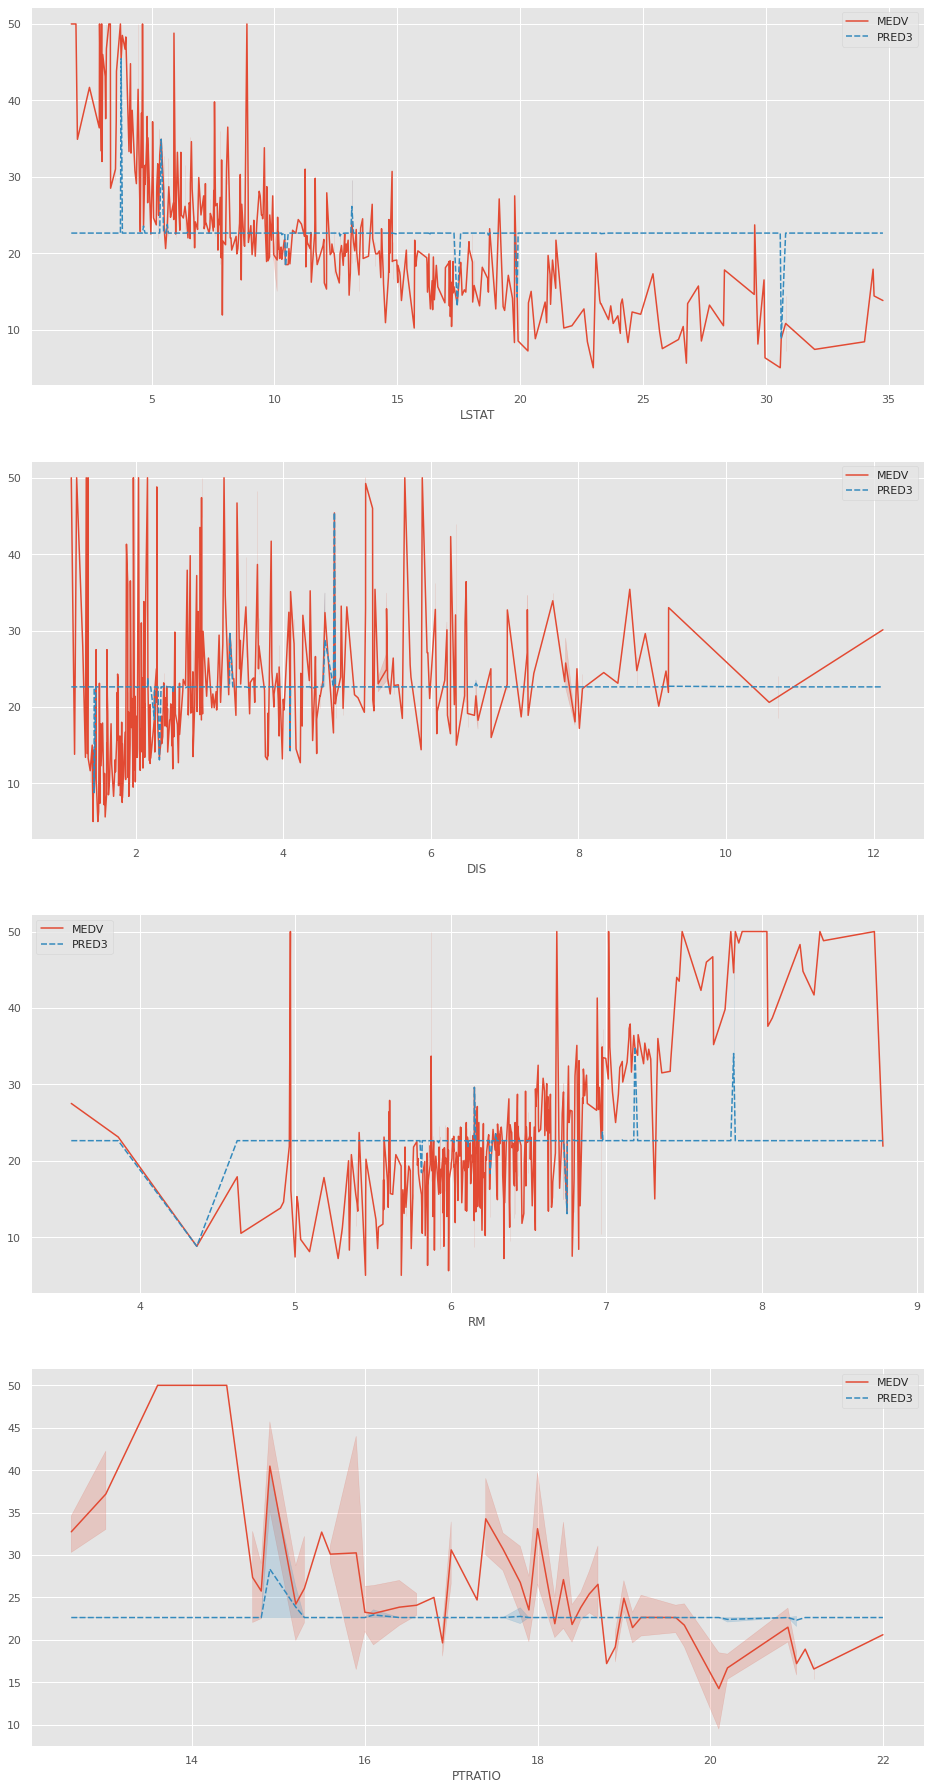

In [148]:
fig3, axes3 = plt.subplots(4, figsize=(16,32))
sns.lineplot(data=train_set.set_index('LSTAT')[['MEDV', 'PRED3']], ax=axes3[0])
sns.lineplot(data=train_set.set_index('DIS')[['MEDV', 'PRED3']], ax=axes3[1])
sns.lineplot(data=train_set.set_index('RM')[['MEDV', 'PRED3']], ax=axes3[2])
sns.lineplot(data=train_set.set_index('PTRATIO')[['MEDV', 'PRED3']], ax=axes3[3])

<div dir="rtl">
مشاهده می‌کنیم که این مدل در مقایسه با ۲ مدل قبلی نتایج ضعیف‌تری در پیش‌بینی مقدار
    MEDV
    به دست می‌دهد. سعی می‌کنیم با تغییر مقدار 
    spatial scale
    تغییرات دقت مدل را بررسی می‌کنیم.
</div>

In [149]:
def calc_rms(pred, y):
    x = pred - y
    return float((x.T.dot(x)) / x.shape[0])


for j in range(1, 20):
    s = j
    temp_phi3 = np.c_[np.ones(X.shape[0]), np.apply_along_axis(get_gaussian_basis_vector, 1, X)]
    temp_w3 = np.linalg.pinv(temp_phi3).dot(y)
    temp_predicted_values3 = temp_phi3.dot(temp_w3)
    print(f'rms with s = {j}: {calc_rms(temp_predicted_values3, y)}')

s = 1

rms with s = 1: 82.33554365914404
rms with s = 2: 78.87000298259551
rms with s = 3: 71.36582493015577
rms with s = 4: 66.10167980192598
rms with s = 5: 63.03936153401844
rms with s = 6: 61.50559208632344
rms with s = 7: 60.72740333556276
rms with s = 8: 60.27833382174524
rms with s = 9: 59.981442067897234
rms with s = 10: 59.76610219576742
rms with s = 11: 59.601471237033465
rms with s = 12: 59.471761041620276
rms with s = 13: 59.367495720113546
rms with s = 14: 59.282313160589496
rms with s = 15: 59.211680180613584
rms with s = 16: 59.15228801130576
rms with s = 17: 59.101702934799725
rms with s = 18: 59.05812728223603
rms with s = 19: 59.02022333693672


<div dir="rtl">
با توجه به تغییرات خطای دیتاست ترین با تغییر
    s
    به نظر در نظر گرفتن مقدار
    s = 7
    برای مدل مناسب‌تر است و خطا را روی دیتاست کاهش می‌یابد. همچنین اگر بردارهای میانگین ۱۰ تابع پایه را به صورتی انتخاب کنیم که از هر گروه داده‌ها که بعد از انجام کاهش بعد داده‌ها به دست می‌آیند، یک بردار مرکزی را انتخاب کنیم، مدل دقیق‌تری خواهیم داشت.
</div>

<div dir="rtl">
نرمال کردن ماتریس داده‌های ترین را نیز آزمایش می‌کنیم. مشاهده می‌کنیم که مقدار خطای ترین کاهش می‌یابد.
</div>

In [150]:
NORM_X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
idx = np.random.randint(NORM_X.shape[0], size=M)
ujs = NORM_X[idx,:]
phi3_ = np.c_[np.ones(NORM_X.shape[0]), np.apply_along_axis(get_gaussian_basis_vector, 1, NORM_X)]
w3_ = np.linalg.pinv(phi3_).dot(y)
print('w is:')
print(w3_)
predicted_values3_ = phi3_.dot(w3_)
print(f'MSE: {calc_rms(predicted_values3_, y)}')

w is:
[ 27.6593914  -13.76720921 -17.99903228 -26.36449621  -6.26663557
 -21.3328609   10.88116     -8.3262905   20.60647925   0.73497655
   7.91151144]
MSE: 49.39052643993395


<div dir="rtl" style="font-size:20px"><b>بخش ششم</b></div>

<div dir="rtl">
برای هر یک از مدل‌های ترین‌شده بالا مقدار خطای دیتاست ترین و تست را بررسی و نمودار مشترک مقادیر پیش‌بینی‌شده و واقعی را رسم می‌کنیم. در مورد مدل سوم به دلیل مشکلی در رسم نمودار jointplot از نمودار heatmap استفاده می‌کنیم.
</div>

In [151]:
test_X = test_set[test_set.columns[:-1]].to_numpy()
test_y = test_set['MEDV'].to_numpy()

test_phi1 = np.c_[np.ones(test_X.shape[0]), test_X]
test_predicted_values1 = test_phi1.dot(w1)

test_phi2 = np.c_[np.ones(test_X.shape[0]), test_X, np.square(test_X)]
test_predicted_values2 = test_phi2.dot(w2)

test_phi3 = np.c_[np.ones(test_X.shape[0]), np.apply_along_axis(get_gaussian_basis_vector, 1, test_X)]
test_predicted_values3 = test_phi3.dot(w3)

model 1 : linear basis
train set MSE: 21.095392539792723
test set MSE: 26.03074404375926




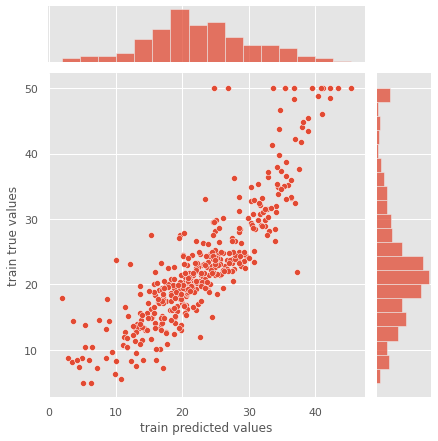

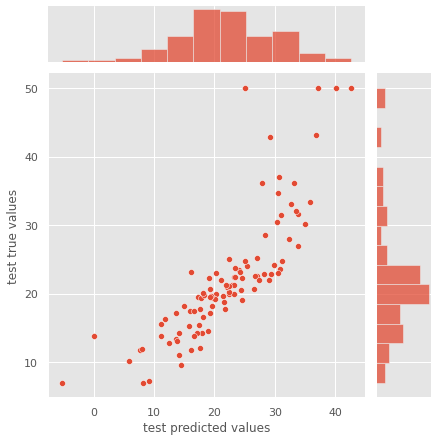

In [152]:
print('model 1 : linear basis')

print(f'train set MSE: {calc_rms(predicted_values1, y)}')
print(f'test set MSE: {calc_rms(test_predicted_values1, test_y)}\n\n')

z = sns.jointplot(x=predicted_values1, y=y)
z.set_axis_labels('train predicted values', 'train true values')
t = sns.jointplot(x=test_predicted_values1, y=test_y)
t.set_axis_labels('test predicted values', 'test true values')

model 2 : linear and squared basis
train set MSE: 13.701809421186471
test set MSE: 17.356458848535983




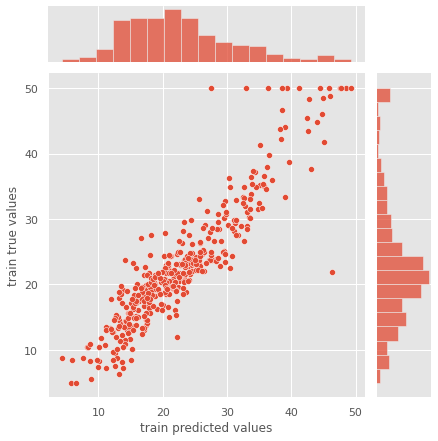

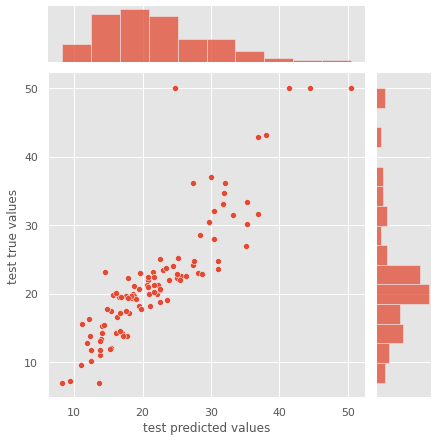

In [153]:
print('model 2 : linear and squared basis')
print(f'train set MSE: {calc_rms(predicted_values2, y)}')
print(f'test set MSE: {calc_rms(test_predicted_values2, test_y)}\n\n')

z = sns.jointplot(x=predicted_values2, y=y)
z.set_axis_labels('train predicted values', 'train true values')
t = sns.jointplot(x=test_predicted_values2, y=test_y)
t.set_axis_labels('test predicted values', 'test true values')

model 3 : gaussian basis
train set MSE: 82.33554365914404
test set MSE: 81.98455878001963


<AxesSubplot:>

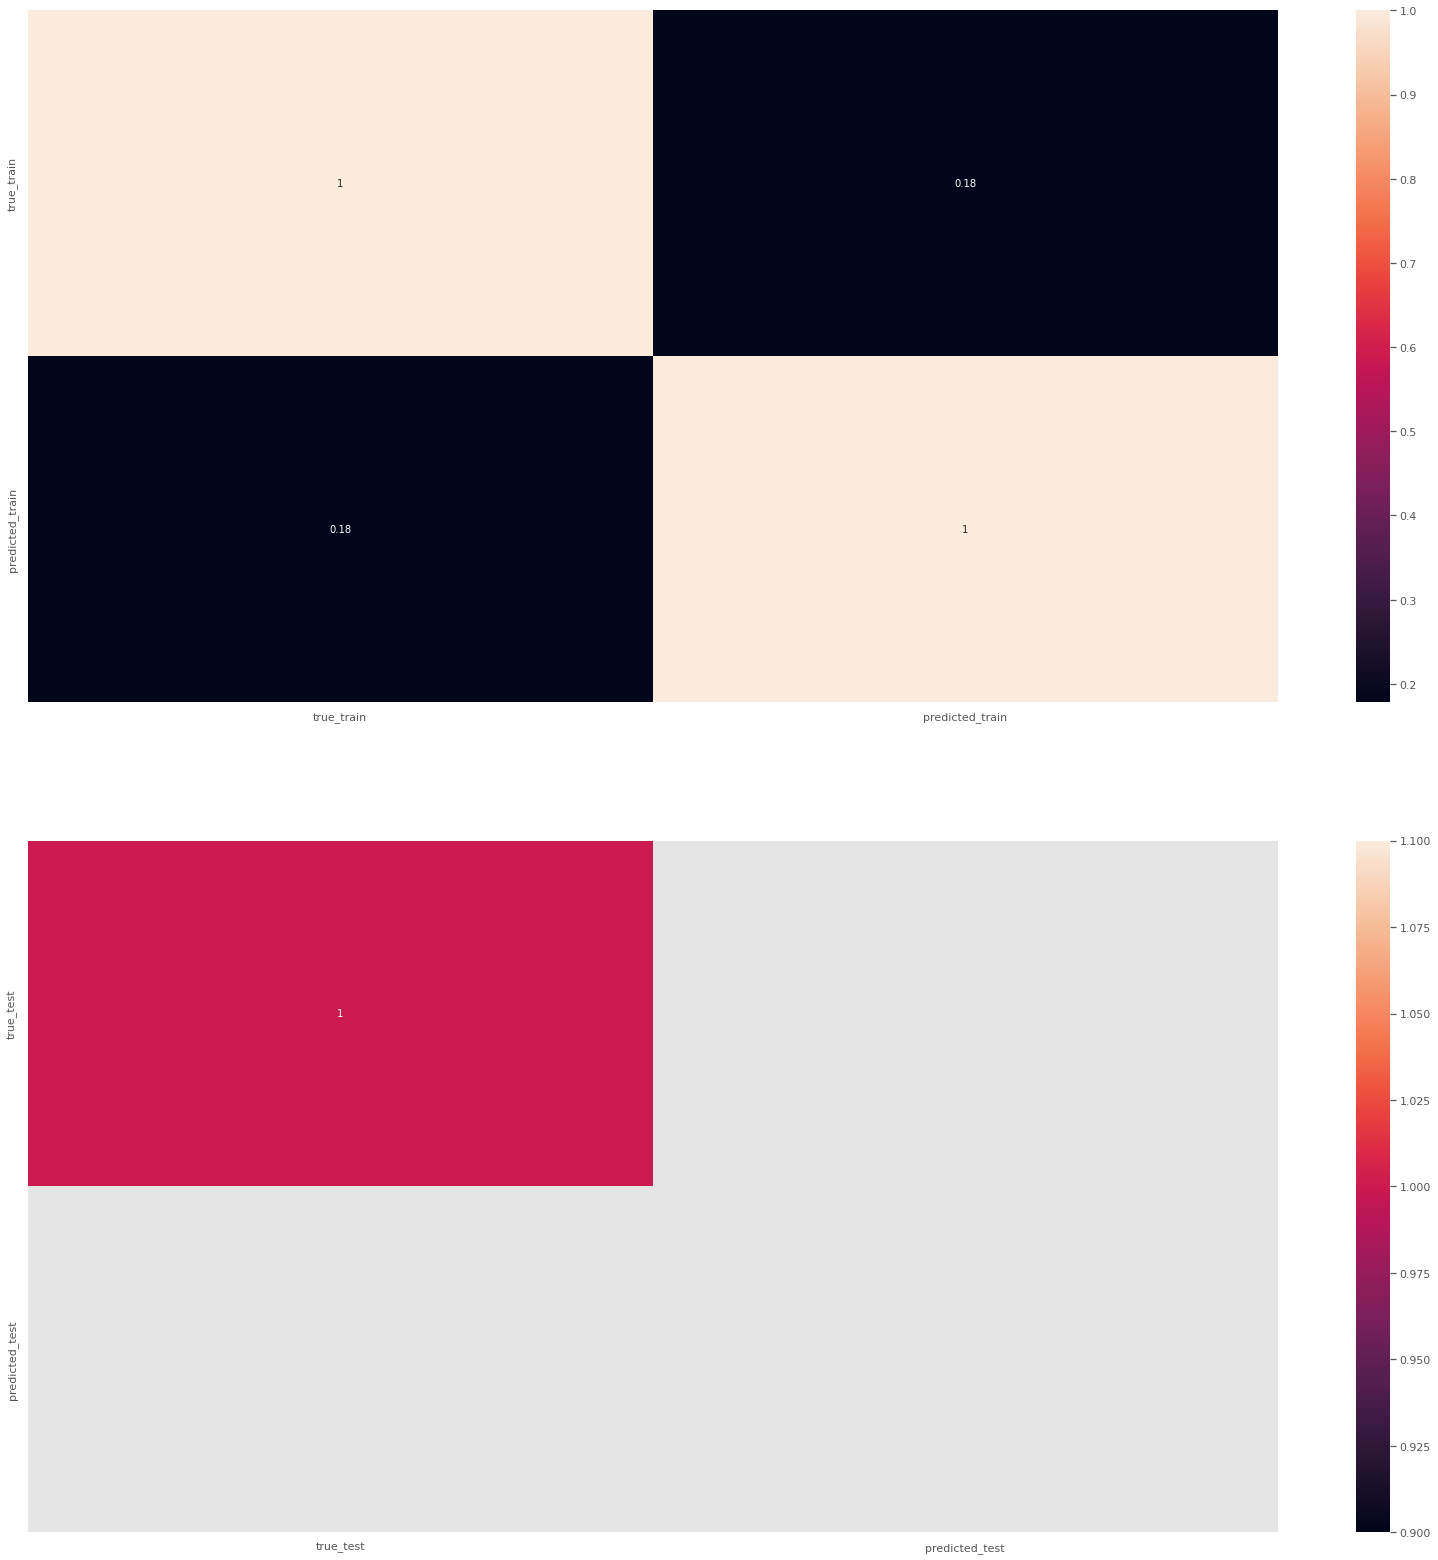

In [154]:
print('model 3 : gaussian basis')
print(f'train set MSE: {calc_rms(predicted_values3, y)}')
print(f'test set MSE: {calc_rms(test_predicted_values3, test_y)}')

_, axes = plt.subplots(2, figsize=(28, 28))
sns.heatmap(pd.DataFrame({"true_train": y , "predicted_train": predicted_values3}).corr(), annot=True, ax=axes[0])
sns.heatmap(pd.DataFrame({"true_test": test_y, "predicted_test": test_predicted_values3}).corr(), annot=True, ax=axes[1])
# z = sns.jointplot(x=predicted_values3, y=y)
# z.set_axis_labels('train predicted values', 'train true values')
# t = sns.jointplot(x=test_predicted_values3, y=test_y)
# t.set_axis_labels('test predicted values', 'test true values')

<div dir="rtl">
با توجه به مقدار خطاها و دقت پیش‌بینی‌های هر ۳ مدل ارائه‌شده، مدل دوم که در آن از توابع پایه خطی و درجه ۲ فیچرها استفاده شده است، دارای دقت و پیچیدگی نسبتا مناسب‌تری از دیگر مدل‌ها است و مدل ارجح‌تری است.
    <br>
    در مدل سوم که از توابع پایه گاوسین استفاده شده است، در حالت عادی پیچیدگی کمی دارد و دقت نامناسبی برخوردار است. بعد از مدل اولیه راهکارهایی برای بهتر شدن دقت مدل گاوسین ارائه‌شده است.
</div>